In [164]:
import os.path

import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [147]:
connection = psycopg2.connect(
    host="localhost",          # Database host
    database="fin_data",  # Database name
    user="",# Database user
    port=5432,
    password=''
)

cursor = connection.cursor()


In [148]:
cursor.execute("""SELECT *
                FROM tweets
                INNER JOIN company_tweets
                ON company_tweets.tweet_id = tweets.tweet_id
                WHERE company_tweets.ticker_symbol in ('AMZN', 'TSLA')
                ORDER BY tweets.post_date;""")

In [149]:
field_names = [i[0] for i in cursor.description]
tweets = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [150]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,tweet_id,ticker_symbol
0,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,550441732014223360,AMZN
1,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,550442977802207232,TSLA
2,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443807834402816,TSLA
3,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443808606126081,TSLA
4,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443809700851716,TSLA


In [151]:
len(tweets)

1815583

In [ ]:
tweets['Date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date

In [153]:
tweets.drop(columns=['post_date'], inplace=True)

In [154]:
tweets['Date'].min(), tweets['Date'].max()

(datetime.date(2015, 1, 1), datetime.date(2019, 12, 31))

In [166]:
data_dir = '/home/katinska/PycharmProjects/TextStock/data/'
#data_dir = '/home/ubuntu/fin_experiment/data/'

In [167]:
tweets = pd.read_csv(os.path.join(data_dir, 'tweets.csv'), index_col=0)

In [168]:
tweets

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound
0,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,550441732014223360,AMZN,2015-01-01,0.006747
1,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,550442977802207232,TSLA,2015-01-01,0.021848
2,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443807834402816,TSLA,2015-01-01,0.011969
3,550443808606126081,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443808606126081,TSLA,2015-01-01,0.015958
4,550443809700851716,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443809700851716,TSLA,2015-01-01,0.011969
...,...,...,...,...,...,...,...,...,...,...
1815578,1212158772015034369,StockJoke,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,1212158772015034369,TSLA,2019-12-31,0.017922
1815579,1212159099632267268,sweetog76,$TSLA Very Interesting dude:,0,0,0,1212159099632267268,TSLA,2019-12-31,0.016386
1815580,1212159184931717120,MelaynaLokosky,If only 2020 brought more self-awareness to Te...,0,1,0,1212159184931717120,TSLA,2019-12-31,0.026988
1815581,1212159838882533376,ShortingIsFun,In 2020 I may start Tweeting out positive news...,0,0,1,1212159838882533376,TSLA,2019-12-31,0.006462


In [169]:
amazonDf = pd.read_csv(os.path.join(data_dir, "stocks/AMZN.csv"))
teslaDf = pd.read_csv(os.path.join(data_dir, "stocks/TSLA.csv"))
amazonDf['Date'] = pd.to_datetime(amazonDf['Date'])
teslaDf['Date'] = pd.to_datetime(teslaDf['Date'])
amazonDf['ticker_symbol'] = 'AMZN'
teslaDf['ticker_symbol'] = 'TSLA'
stock_data = pd.concat([amazonDf, teslaDf], ignore_index=True)

In [170]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol
8210,2020-03-26,547.390015,560.000000,512.250000,528.159973,528.159973,17380700,TSLA
8211,2020-03-27,505.000000,525.799988,494.029999,514.359985,514.359985,14377400,TSLA
8212,2020-03-30,510.260010,516.650024,491.230011,502.130005,502.130005,11998100,TSLA
8213,2020-03-31,501.250000,542.960022,497.000000,524.000000,524.000000,17771500,TSLA
8214,2020-04-01,504.000000,513.950012,475.100006,481.559998,481.559998,13304500,TSLA


In [120]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ticker_symbol'],
      dtype='object')

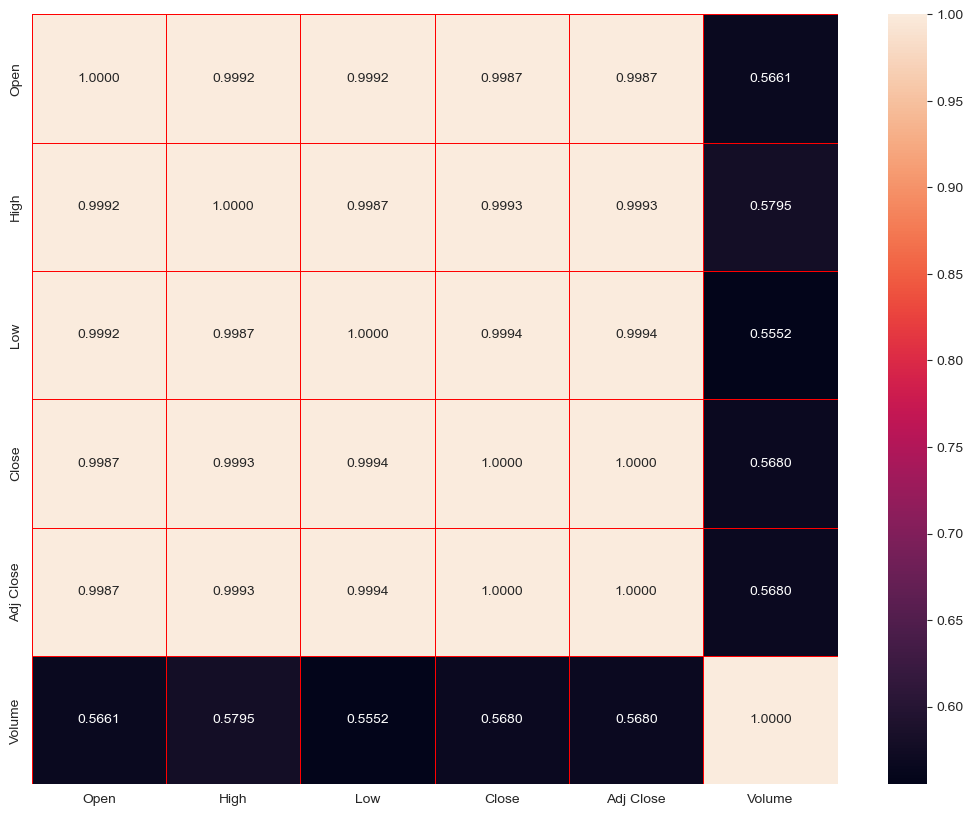

In [131]:
f,ax = plt.subplots(figsize=(13,10))
numeric_df = teslaDf.select_dtypes(include=['float', 'int'])
#numeric_df = numeric_df.drop(columns=['Date'])
sns.heatmap(numeric_df.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

In [138]:
# def outlier_thresholds(dataframe, col_name, q1 = 0.05, q3 = 0.95):
#     quartile1 = dataframe[col_name].quantile(q1)
#     quartile3 = dataframe[col_name].quantile(q3)
#     interquantile_range = quartile3 - quartile1
#     up_limit = quartile3 + 1.5 * interquantile_range
#     low_limit = quartile1 - 1.5 * interquantile_range
#     return low_limit, up_limit
# 
# def check_outlier(dataframe, col_name):
#     low_limit, up_limit = outlier_thresholds(dataframe, col_name)
#     print(low_limit, up_limit)
#     if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
#         return True
#     else:
#         return False

In [137]:
# for i in numeric_df.columns:
#     check_value = check_outlier(numeric_df, i)
#     print(f"{i}: {check_value}")

In [136]:
# def replace_with_thresholds(dataframe, variable):
#     low_limit, up_limit = outlier_thresholds(dataframe, variable)
#     dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
#     dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

In [ ]:
# for i in numeric_df.columns:
#     check_value = check_outlier(numeric_df, i)
#     if check_value:
#         replace_with_thresholds(numeric_df, i)

In [156]:
tweets['Date'] = pd.to_datetime(tweets['Date'])

In [5]:
tweets

,Unnamed: 0,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date
0,0,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,550441732014223360,AMZN,2015-01-01
1,1,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,550442977802207232,TSLA,2015-01-01
2,2,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443807834402816,TSLA,2015-01-01
3,3,550443808606126081,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443808606126081,TSLA,2015-01-01
4,4,550443809700851716,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443809700851716,TSLA,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
1815578,1815578,1212158772015034369,StockJoke,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,1212158772015034369,TSLA,2019-12-31
1815579,1815579,1212159099632267268,sweetog76,$TSLA Very Interesting dude:,0,0,0,1212159099632267268,TSLA,2019-12-31
1815580,1815580,1212159184931717120,MelaynaLokosky,If only 2020 brought more self-awareness to Te...,0,1,0,1212159184931717120,TSLA,2019-12-31
1815581,1815581,1212159838882533376,ShortingIsFun,In 2020 I may start Tweeting out positive news...,0,0,1,1212159838882533376,TSLA,2019-12-31


In [152]:
data_combined = pd.merge(tweets, stock_data, on=['Date', 'ticker_symbol'], how='inner')

In [153]:
data_combined.to_csv(os.path.join(data_dir, 'amazon_tesla_full_data.csv'))

In [190]:
data_combined

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,550804137118801921,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,550804137118801921,AMZN,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,550804503650242560,arianerandolph,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,550804503650242560,TSLA,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2,550806376092807168,craigbuj,perfectly trading the S&P 500 in 2014 $FB $MU ...,0,0,1,550806376092807168,AMZN,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
3,550807696451334144,Scott_Klemke,Tesla's next charger will automatically connec...,0,0,0,550807696451334144,TSLA,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
4,550808188237279232,1Copenut,"@KyleRohde @thehilker It could be, but that's ...",0,0,1,550808188237279232,AMZN,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544839,1212158772015034369,StockJoke,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,1212158772015034369,TSLA,2019-12-31,405.000000,421.290009,402.079987,418.329987,418.329987,10285700
1544840,1212159099632267268,sweetog76,$TSLA Very Interesting dude:,0,0,0,1212159099632267268,TSLA,2019-12-31,405.000000,421.290009,402.079987,418.329987,418.329987,10285700
1544841,1212159184931717120,MelaynaLokosky,If only 2020 brought more self-awareness to Te...,0,1,0,1212159184931717120,TSLA,2019-12-31,405.000000,421.290009,402.079987,418.329987,418.329987,10285700
1544842,1212159838882533376,ShortingIsFun,In 2020 I may start Tweeting out positive news...,0,0,1,1212159838882533376,TSLA,2019-12-31,405.000000,421.290009,402.079987,418.329987,418.329987,10285700


# Vader sentiment analysis

In [157]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
sentences = tweets["body"]
sentenceSample = sentences[:10]
sentenceSampleDf = pd.DataFrame(sentenceSample)
sentenceSampleDf

,body
0,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
1,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
2,Swing Trading: Up To 8.91% Return In 14 Days h...
3,Swing Trading: Up To 8.91% Return In 14 Days h...
4,Swing Trading: Up To 8.91% Return In 14 Days h...
5,Swing Trading: Up To 8.91% Return In 14 Days h...
6,Swing Trading: Up To 8.91% Return In 14 Days h...
7,Swing Trading: Up To 8.91% Return In 14 Days h...
8,Swing Trading: Up To 8.91% Return In 14 Days h...
9,Top 10 searched #stocks of #2014 $AAPL $FB $BA...


In [158]:
def get_headline_sentiment(row):
    compound_scores = [analyzer.polarity_scores(t)['compound'] for t in row]
    return np.mean(compound_scores)


In [160]:
tweets['vader_compound'] = pd.DataFrame(tweets['body'].apply(get_headline_sentiment))


In [161]:
tweets.head()

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id,ticker_symbol,Date,vader_compound
0,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,550441732014223360,AMZN,2015-01-01,0.006747
1,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,550442977802207232,TSLA,2015-01-01,0.021848
2,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443807834402816,TSLA,2015-01-01,0.011969
3,550443808606126081,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443808606126081,TSLA,2015-01-01,0.015958
4,550443809700851716,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550443809700851716,TSLA,2015-01-01,0.011969


In [162]:
tweets.to_csv(os.path.join(data_dir, 'tweets.csv'))

# Inspect likes/retweets/commens. Filter tweets with 0 likes, comments, or retweets

In [8]:
tweets['like_num'].describe().apply("{0:.2f}".format)

count    1815583.00
mean           3.72
std           19.24
min            0.00
25%            0.00
50%            0.00
75%            2.00
max          999.00
Name: like_num, dtype: object

In [9]:
print(tweets['comment_num'].value_counts())

comment_num
0      1425389
1       243793
2        69114
3        27329
4        14171
        ...   
131          1
194          1
234          1
143          1
149          1
Name: count, Length: 184, dtype: int64


In [10]:
# Calculate percentage of zero likes
zero_percentage = (tweets['like_num'] == 0).mean() * 100
print(f"Percentage of zero likes: {zero_percentage:.2f}%")

Percentage of zero likes: 55.03%


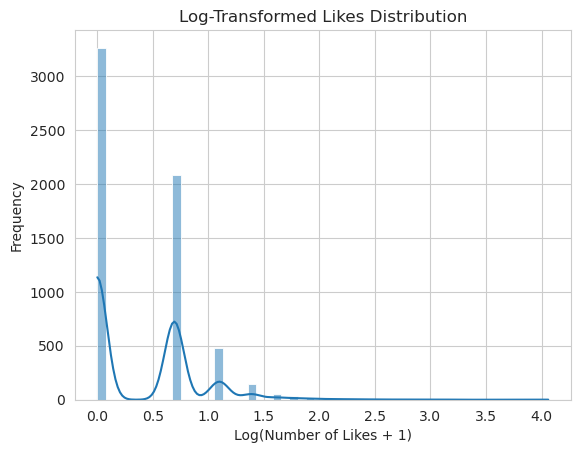

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Add 1 to avoid log(0) and apply log transformation
like_num_log = np.log1p(tweets['like_num'])

# Visualize the transformed data
sns.histplot(like_num_log, kde=True)
plt.title('Log-Transformed Likes Distribution')
plt.xlabel('Log(Number of Likes + 1)')
plt.ylabel('Frequency')
plt.show()

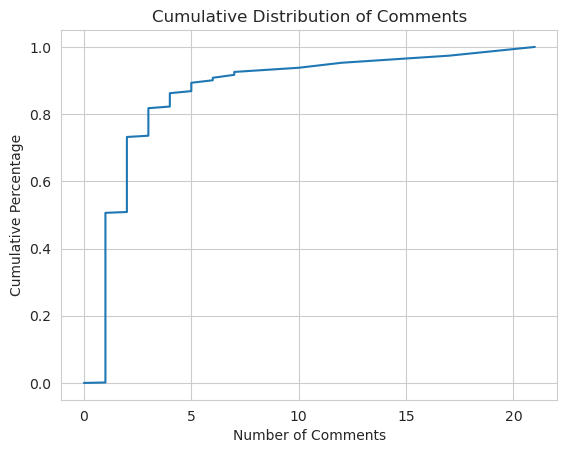

In [24]:
plt.show()
likes_sorted = tweets['comment_num'].sort_values()
cdf = likes_sorted.cumsum() / likes_sorted.sum()

# Plot CDF
plt.plot(likes_sorted, cdf)
plt.title('Cumulative Distribution of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Cumulative Percentage')
plt.show()

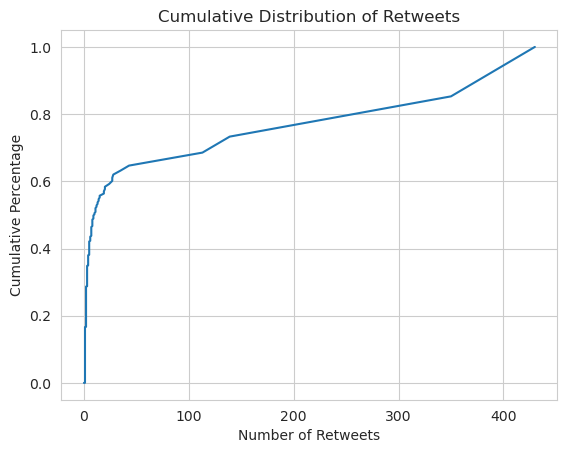

In [23]:
plt.show()
likes_sorted = tweets['retweet_num'].sort_values()
cdf = likes_sorted.cumsum() / likes_sorted.sum()

# Plot CDF
plt.plot(likes_sorted, cdf)
plt.title('Cumulative Distribution of Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Cumulative Percentage')
plt.show()

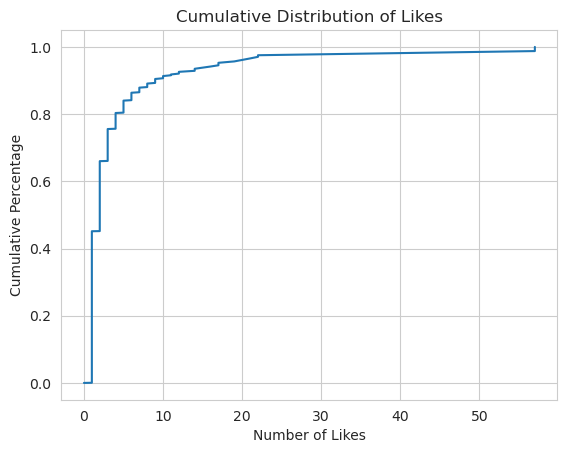

In [20]:
likes_sorted = tweets['like_num'].sort_values()
cdf = likes_sorted.cumsum() / likes_sorted.sum()

# Plot CDF
plt.plot(likes_sorted, cdf)
plt.title('Cumulative Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Cumulative Percentage')
plt.show()

In [8]:
tweets.dropna(inplace=True) # Remove rows with NaN due to shifting
assert len(tweets[tweets.isna().any(axis=1)]) == 0

In [9]:
filtered_tweets = tweets.loc[
    (tweets['like_num'] > 0) | (tweets['retweet_num'] > 0) | (tweets['comment_num'] > 0)]

In [10]:
len(tweets), len(filtered_tweets)

(1782394, 938646)

In [15]:
filtered_tweets.to_csv(os.path.join(data_dir, 'filtered_tweets.csv'))

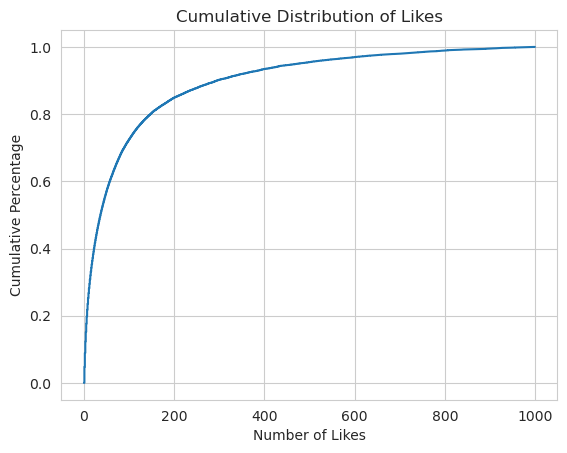

In [38]:
likes_sorted = tweets['like_num'].sort_values()
cdf = likes_sorted.cumsum() / likes_sorted.sum()

# Plot CDF
plt.plot(likes_sorted, cdf)
plt.title('Cumulative Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Cumulative Percentage')
plt.show()

# Add aspect based sentiment score

In [11]:
from setfit import AbsaTrainer, TrainingArguments


In [12]:
import random
import numpy as np
import torch
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
from setfit import AbsaModel

torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [13]:
model = AbsaModel.from_pretrained(
       'Askinkaty/setfit-finance-aspect',
       'Askinkaty/setfit-finance-polarity',
        spacy_model="en_core_web_sm",
    )

model.to(device)

In [20]:
tweets['body'][:10]

0    S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
1    $GM $TSLA: Volkswagen Pushes 2014 Record Recal...
2    Swing Trading: Up To 8.91% Return In 14 Days h...
3    Swing Trading: Up To 8.91% Return In 14 Days h...
4    Swing Trading: Up To 8.91% Return In 14 Days h...
5    Swing Trading: Up To 8.91% Return In 14 Days h...
6    Swing Trading: Up To 8.91% Return In 14 Days h...
7    Swing Trading: Up To 8.91% Return In 14 Days h...
8    Swing Trading: Up To 8.91% Return In 14 Days h...
9    Top 10 searched #stocks of #2014 $AAPL $FB $BA...
Name: body, dtype: object

In [14]:
def predict_in_batches_fast(df, column, model, batch_size=128):
    results = []
    for i in range(0, len(df), batch_size):
        batch = df[column].iloc[i:i + batch_size].tolist()  # Get the batch as a list
        predictions = model.predict(batch)  # Batch predict
        results.extend(predictions)
    return results


# Use engagement metrics

In [226]:
filtered_tweets = pd.read_csv(os.path.join(data_dir, 'filtered_tweets.csv'), index_col=0)

In [227]:
len(filtered_tweets)

957376

In [228]:
filtered_tweets = filtered_tweets.loc[
    (filtered_tweets['like_num'] > 5) | (filtered_tweets['retweet_num'] > 5) | (filtered_tweets['comment_num'] > 5)]

In [229]:
filtered_tweets

,Unnamed: 0,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound,absa_sentiment
12,12,550453624258965505,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,550453624258965505,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'..."
54,54,550499176422051840,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,550499176422051840,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'..."
116,116,550650235404701697,greatspoke,Analyst Report on Top Stock Market Options for...,0,430,3,550650235404701697,AMZN,2015-01-01,0.017313,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp..."
147,147,550690489008394241,IBDinvestors,2015 technology forecasts: Wearable technology...,0,8,11,550690489008394241,AMZN,2015-01-01,0.025489,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp..."
171,171,550713309117562880,SamAntar,Memo to @elonmusk: Tesla's accounting is as cr...,1,2,6,550713309117562880,TSLA,2015-01-01,0.029600,"[{'span': 'Tesla', 'polarity': 'neutral'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1815539,1815539,1212136078909423616,ValueExpected,"$TSLA AZ Delivery #SGFreportAs predicted, Scot...",0,0,11,1212136078909423616,TSLA,2019-12-31,0.018457,"[{'span': 'DC tomorrow', 'polarity': 'neutral'..."
1815541,1815541,1212137019520012288,traderDanielle,Finished my EOY review.Best setups:1. Short sq...,4,0,13,1212137019520012288,TSLA,2019-12-31,0.003761,"[{'span': 'AMD', 'polarity': 'neutral'}, {'spa..."
1815542,1815542,1212138184479510528,NaN,“Alpha male” Mike Cernovich is a bootlicker? W...,3,3,7,1212138184479510528,TSLA,2019-12-31,0.034239,"[{'span': 'Alpha male', 'polarity': 'neutral'}]"
1815545,1815545,1212139534508412928,MelaynaLokosky,"In 2016 14.6 million cars had USB ports; and, ...",0,0,7,1212139534508412928,TSLA,2019-12-31,0.018271,"[{'span': 'Chrysler Pacifica MINIVAN', 'polari..."


In [230]:
filtered_tweets = filtered_tweets.loc[:, ~filtered_tweets.columns.str.contains('^Unnamed')]


In [231]:
eval(filtered_tweets['absa_sentiment'].iloc[2])


[{'span': 'AAPL', 'polarity': 'neutral'},
 {'span': 'AMZN', 'polarity': 'neutral'}]

In [232]:
from collections import Counter

def aggregate_absa_sentiment(row):
    company_name = {'AMZN': 'Amazon', 'TSLA': 'Tesla'}
    ticker = row['ticker_symbol']
    sentiment_dict = eval(row['absa_sentiment'])
    sentiments = []
    if len(sentiment_dict):
        for item in sentiment_dict:
            if item['span'] == ticker or item['span'] == company_name[ticker]:
                return item['polarity']
            else:
                sentiments.append(item['polarity'])
        counter = Counter(sentiments)
        most_frequent = counter.most_common(1)  # Returns a list of tuples [(string, count)]
        most_frequent_sent = most_frequent[0][0]
        return most_frequent_sent
    else:
        return 'neutral'
    

In [233]:
len(filtered_tweets[filtered_tweets.isna().any(axis=1)])

4398

In [234]:
filtered_tweets_clean = filtered_tweets.dropna() 

In [235]:
filtered_tweets_clean['absa_sentiment_company'] = filtered_tweets_clean.apply(aggregate_absa_sentiment, axis=1)

/tmp/ipykernel_49616/3611434069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets_clean['absa_sentiment_company'] = filtered_tweets_clean.apply(aggregate_absa_sentiment, axis=1)


In [236]:
filtered_tweets_clean

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound,absa_sentiment,absa_sentiment_company
12,550453624258965505,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,550453624258965505,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative
54,550499176422051840,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,550499176422051840,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative
116,550650235404701697,greatspoke,Analyst Report on Top Stock Market Options for...,0,430,3,550650235404701697,AMZN,2015-01-01,0.017313,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral
147,550690489008394241,IBDinvestors,2015 technology forecasts: Wearable technology...,0,8,11,550690489008394241,AMZN,2015-01-01,0.025489,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral
171,550713309117562880,SamAntar,Memo to @elonmusk: Tesla's accounting is as cr...,1,2,6,550713309117562880,TSLA,2015-01-01,0.029600,"[{'span': 'Tesla', 'polarity': 'neutral'}]",neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1815517,1212128778786349057,ValueAnalyst1,$TSLA Interesting...$93M trade after hours!Whe...,15,7,64,1212128778786349057,TSLA,2019-12-31,0.006554,[],neutral
1815539,1212136078909423616,ValueExpected,"$TSLA AZ Delivery #SGFreportAs predicted, Scot...",0,0,11,1212136078909423616,TSLA,2019-12-31,0.018457,"[{'span': 'DC tomorrow', 'polarity': 'neutral'...",neutral
1815541,1212137019520012288,traderDanielle,Finished my EOY review.Best setups:1. Short sq...,4,0,13,1212137019520012288,TSLA,2019-12-31,0.003761,"[{'span': 'AMD', 'polarity': 'neutral'}, {'spa...",neutral
1815545,1212139534508412928,MelaynaLokosky,"In 2016 14.6 million cars had USB ports; and, ...",0,0,7,1212139534508412928,TSLA,2019-12-31,0.018271,"[{'span': 'Chrysler Pacifica MINIVAN', 'polari...",neutral


In [237]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_sentiment(df, col_name):
    """
    Encodes sentiment feature with one-hot encoding, correctly
    handling DataFrame alignment.

    Args:
      df (pd.DataFrame): the input dataframe
      col_name (str): column of the sentiment feature to encode

    Returns:
      pandas DataFrame: The dataframe with the encoded features
    """
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # sparse=False for NumPy, handle_unknown to ignore if out-of vocabulary data
    encoded_data = encoder.fit_transform(df[[col_name]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col_name]), index=df.index)

    # Join the encoded dataframe back to the original dataframe
    df = df.join(encoded_df)
    return df

#df = one_hot_encode_sentiment(df, 'sentiment')


In [238]:
filtered_tweets_clean = one_hot_encode_sentiment(filtered_tweets_clean, 'absa_sentiment_company')

In [239]:
filtered_tweets_clean

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound,absa_sentiment,absa_sentiment_company,absa_sentiment_company_negative,absa_sentiment_company_neutral,absa_sentiment_company_positive
12,550453624258965505,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,550453624258965505,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative,1.0,0.0,0.0
54,550499176422051840,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,550499176422051840,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative,1.0,0.0,0.0
116,550650235404701697,greatspoke,Analyst Report on Top Stock Market Options for...,0,430,3,550650235404701697,AMZN,2015-01-01,0.017313,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral,0.0,1.0,0.0
147,550690489008394241,IBDinvestors,2015 technology forecasts: Wearable technology...,0,8,11,550690489008394241,AMZN,2015-01-01,0.025489,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral,0.0,1.0,0.0
171,550713309117562880,SamAntar,Memo to @elonmusk: Tesla's accounting is as cr...,1,2,6,550713309117562880,TSLA,2015-01-01,0.029600,"[{'span': 'Tesla', 'polarity': 'neutral'}]",neutral,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815517,1212128778786349057,ValueAnalyst1,$TSLA Interesting...$93M trade after hours!Whe...,15,7,64,1212128778786349057,TSLA,2019-12-31,0.006554,[],neutral,0.0,1.0,0.0
1815539,1212136078909423616,ValueExpected,"$TSLA AZ Delivery #SGFreportAs predicted, Scot...",0,0,11,1212136078909423616,TSLA,2019-12-31,0.018457,"[{'span': 'DC tomorrow', 'polarity': 'neutral'...",neutral,0.0,1.0,0.0
1815541,1212137019520012288,traderDanielle,Finished my EOY review.Best setups:1. Short sq...,4,0,13,1212137019520012288,TSLA,2019-12-31,0.003761,"[{'span': 'AMD', 'polarity': 'neutral'}, {'spa...",neutral,0.0,1.0,0.0
1815545,1212139534508412928,MelaynaLokosky,"In 2016 14.6 million cars had USB ports; and, ...",0,0,7,1212139534508412928,TSLA,2019-12-31,0.018271,"[{'span': 'Chrysler Pacifica MINIVAN', 'polari...",neutral,0.0,1.0,0.0


In [240]:
filtered_tweets_clean['total_engagement'] = filtered_tweets_clean['like_num'] + 2 * filtered_tweets_clean['retweet_num'] + 3 * filtered_tweets_clean['comment_num']


In [241]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def calculate_weights_transformed(df, engagement_col, transformation='log'):
    """Calculates weights based on engagement using transformations."""
    engagement_values = df[[engagement_col]].values.astype(float)
    if transformation == 'log':
        df['weight'] = np.log1p(engagement_values)
    elif transformation == 'sqrt':
        df['weight'] = np.sqrt(engagement_values)
    elif transformation == 'minmax':
        scaler = MinMaxScaler()
        df['weight'] = scaler.fit_transform(engagement_values)
    elif transformation == 'standard':
        scaler = StandardScaler()
        df['weight'] = scaler.fit_transform(engagement_values)
    return df

In [242]:
filtered_tweets_clean = calculate_weights_transformed(filtered_tweets_clean.copy(), 'total_engagement', 'standard')


In [243]:
filtered_tweets_clean['weight'].max(), filtered_tweets_clean['weight'].min()

(27.397370526857834, -0.44923633464489326)

In [244]:
filtered_tweets_clean

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound,absa_sentiment,absa_sentiment_company,absa_sentiment_company_negative,absa_sentiment_company_neutral,absa_sentiment_company_positive,total_engagement,weight
12,550453624258965505,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,550453624258965505,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative,1.0,0.0,0.0,398,3.709190
54,550499176422051840,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,550499176422051840,AMZN,2015-01-01,0.014488,"[{'span': 'Jeff Bezos', 'polarity': 'negative'...",negative,1.0,0.0,0.0,334,3.030263
116,550650235404701697,greatspoke,Analyst Report on Top Stock Market Options for...,0,430,3,550650235404701697,AMZN,2015-01-01,0.017313,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral,0.0,1.0,0.0,863,8.642018
147,550690489008394241,IBDinvestors,2015 technology forecasts: Wearable technology...,0,8,11,550690489008394241,AMZN,2015-01-01,0.025489,"[{'span': 'AAPL', 'polarity': 'neutral'}, {'sp...",neutral,0.0,1.0,0.0,27,-0.226463
171,550713309117562880,SamAntar,Memo to @elonmusk: Tesla's accounting is as cr...,1,2,6,550713309117562880,TSLA,2015-01-01,0.029600,"[{'span': 'Tesla', 'polarity': 'neutral'}]",neutral,0.0,1.0,0.0,13,-0.374979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815517,1212128778786349057,ValueAnalyst1,$TSLA Interesting...$93M trade after hours!Whe...,15,7,64,1212128778786349057,TSLA,2019-12-31,0.006554,[],neutral,0.0,1.0,0.0,123,0.791927
1815539,1212136078909423616,ValueExpected,"$TSLA AZ Delivery #SGFreportAs predicted, Scot...",0,0,11,1212136078909423616,TSLA,2019-12-31,0.018457,"[{'span': 'DC tomorrow', 'polarity': 'neutral'...",neutral,0.0,1.0,0.0,11,-0.396195
1815541,1212137019520012288,traderDanielle,Finished my EOY review.Best setups:1. Short sq...,4,0,13,1212137019520012288,TSLA,2019-12-31,0.003761,"[{'span': 'AMD', 'polarity': 'neutral'}, {'spa...",neutral,0.0,1.0,0.0,25,-0.247680
1815545,1212139534508412928,MelaynaLokosky,"In 2016 14.6 million cars had USB ports; and, ...",0,0,7,1212139534508412928,TSLA,2019-12-31,0.018271,"[{'span': 'Chrysler Pacifica MINIVAN', 'polari...",neutral,0.0,1.0,0.0,7,-0.438628


In [245]:
filtered_tweets_clean['weighted_vader_compound'] = filtered_tweets_clean['weight'] * filtered_tweets_clean['vader_compound']
#daily_sentiment = df.groupby(df.index.date)['weighted_sentiment'].sum() / df.groupby(df.index.date)['weight'].sum()

In [246]:
def apply_sentiment_weights(df):
    df['weighted_positive'] = df['absa_sentiment_company_positive'] * df['weight']
    df['weighted_neutral'] = df['absa_sentiment_company_neutral'] * df['weight']
    df['weighted_negative'] = df['absa_sentiment_company_negative'] * df['weight']
    return df

In [247]:
filtered_tweets_clean = apply_sentiment_weights(filtered_tweets_clean)

In [248]:
filtered_tweets_clean.tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,tweet_id.1,ticker_symbol,Date,vader_compound,...,absa_sentiment_company,absa_sentiment_company_negative,absa_sentiment_company_neutral,absa_sentiment_company_positive,total_engagement,weight,weighted_vader_compound,weighted_positive,weighted_neutral,weighted_negative
1815517,1212128778786349057,ValueAnalyst1,$TSLA Interesting...$93M trade after hours!Whe...,15,7,64,1212128778786349057,TSLA,2019-12-31,0.006554,...,neutral,0.0,1.0,0.0,123,0.791927,0.005191,0.0,0.791927,0.0
1815539,1212136078909423616,ValueExpected,"$TSLA AZ Delivery #SGFreportAs predicted, Scot...",0,0,11,1212136078909423616,TSLA,2019-12-31,0.018457,...,neutral,0.0,1.0,0.0,11,-0.396195,-0.007313,-0.0,-0.396195,-0.0
1815541,1212137019520012288,traderDanielle,Finished my EOY review.Best setups:1. Short sq...,4,0,13,1212137019520012288,TSLA,2019-12-31,0.003761,...,neutral,0.0,1.0,0.0,25,-0.247680,-0.000931,-0.0,-0.247680,-0.0
1815545,1212139534508412928,MelaynaLokosky,"In 2016 14.6 million cars had USB ports; and, ...",0,0,7,1212139534508412928,TSLA,2019-12-31,0.018271,...,neutral,0.0,1.0,0.0,7,-0.438628,-0.008014,-0.0,-0.438628,-0.0
1815550,1212140828392640517,patienttrading,$AMZN skake out is over. MM’s tested supply la...,0,2,11,1212140828392640517,AMZN,2019-12-31,0.016241,...,neutral,0.0,1.0,0.0,15,-0.353762,-0.005745,-0.0,-0.353762,-0.0


In [249]:
def aggregate_tweets_by_date(df):
    # Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    grouped = df.groupby(['Date', 'ticker_symbol'])

    # Aggregate tweets (body) into a list for each day
    daily_tweets = grouped['body'].apply(list)
    
    daily_engagement = grouped['total_engagement'].mean()
    daily_weight = grouped['weight'].mean()
    daily_sentiment_vader = grouped['vader_compound'].mean()
    daily_sentiment_vader_weighted = grouped['weighted_vader_compound'].mean()
    daily_positive_weighted = grouped['weighted_positive'].mean()
    daily_negative_weighted = grouped['weighted_negative'].mean()
    daily_neutral_weighted = grouped['weighted_neutral'].mean()

    # Combine the aggregated dataframes
    aggregated_df = pd.concat([daily_tweets, daily_engagement, daily_weight, daily_sentiment_vader, daily_sentiment_vader_weighted, 
                               daily_positive_weighted, daily_negative_weighted, daily_neutral_weighted], axis=1)

    # Rename the 'body' column to 'tweets'
    aggregated_df = aggregated_df.rename(columns={'body': 'tweets'})

    return aggregated_df

In [250]:
tweets_aggregated = aggregate_tweets_by_date(filtered_tweets_clean.copy())

In [251]:
tweets_aggregated.loc[(slice(None), 'TSLA'), :]


,,tweets,total_engagement,weight,vader_compound,weighted_vader_compound,weighted_positive,weighted_negative,weighted_neutral
Date,ticker_symbol,,,,,,,,
2015-01-01,TSLA,[Memo to @elonmusk: Tesla's accounting is as c...,26.000000,-0.237072,0.029011,-0.006959,0.000000,0.000000,-0.237072
2015-01-02,TSLA,"[Earlier post, see pivots points regarding $CM...",33.000000,-0.162814,0.022058,-0.003591,0.000000,0.000000,-0.162814
2015-01-03,TSLA,[Tesla: The Car Of The Future And The Good Inv...,15.000000,-0.353762,0.010571,-0.003740,-0.353762,0.000000,0.000000
2015-01-05,TSLA,"[My Weekend Review 1.4.15: $SPY, $IWM, $QQQ, $...",22.833333,-0.270664,0.021285,-0.005609,-0.064264,0.000000,-0.206400
2015-01-07,TSLA,[The 7 most-searched stocks:7. $FB6. $TSLA5. $...,84.000000,0.378206,0.006037,0.002283,0.000000,0.000000,0.378206
...,...,...,...,...,...,...,...,...,...
2019-12-27,TSLA,"[$amzn $1879 coming then $1900$googl $1369, $1...",75.290441,0.285813,0.023151,0.006132,0.002915,0.050642,0.232256
2019-12-28,TSLA,[What possible help would Elon be? He's not a...,54.748201,0.067896,0.020280,0.001731,0.002004,0.010197,0.055695
2019-12-29,TSLA,[The only reason I’d support @ewarren for POTU...,45.616667,-0.028974,0.021661,-0.000372,-0.006883,-0.006140,-0.015951


In [270]:
import pandas as pd
import re

def preprocess_tweets(df, tweet_column='tweet'):

    def clean_tweet_list(tweet_list):
        if not isinstance(tweet_list, list):
            return []  # Handle cases where the entry is not a list

        unique_tweets = set(tweet_list)
        cleaned_tweets = []
        for tweet in unique_tweets:
            # Remove hyperlinks
            tweet_no_links = re.sub(r'https?://\S+|www\.\S+', '', tweet)
            # Remove very short tweets
            if len(tweet_no_links.split()) < 5:
                continue
            cleaned_tweets.append(tweet_no_links.strip())  # Remove leading/trailing whitespace
        return [tweet for tweet in cleaned_tweets if tweet] # Remove any empty strings after cleaning

    df[tweet_column + '_cleaned'] = df[tweet_column].apply(clean_tweet_list)
    return df


tweets_aggregated_clean = preprocess_tweets(tweets_aggregated.copy(), tweet_column='tweets')

In [271]:
tweets_aggregated_clean['tweets_cleaned'].iloc[1]

["Memo to @elonmusk: Blocking me on twitter won't stop the fire. Telsa's accounting will burn like it's cars. $TSLA",
 "Memo to @elonmusk: Tesla's accounting is as creative as its engineering. Eventually it will catch fire like your cars. $TSLA"]

In [289]:
tweets_aggregated_clean['tweet_count'] = tweets_aggregated_clean['tweets_cleaned'].apply(len)
row_with_max_tweets = tweets_aggregated_clean.loc[tweets_aggregated_clean['tweet_count'].idxmax()]

In [303]:
# tweets_aggregated_clean.drop(index=tweets_aggregated_clean['tweet_count'].idxmax())['tweets_cleaned'].apply(len).max()

In [292]:
def drop_rows_with_zero_tweets(df, tweet_column):
    return df[df[tweet_column].apply(lambda x: len(x) > 0)]

tweets_aggregated_clean = drop_rows_with_zero_tweets(tweets_aggregated_clean, 'tweets_cleaned')

In [295]:
tweets_aggregated_clean['tweets_cleaned'].apply(len)

54.24958123953099

# Merge with market data

In [304]:
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date


In [305]:
merged = pd.merge(stock_data, tweets_aggregated_clean.reset_index(), on=['Date', 'ticker_symbol'], how='inner')

In [306]:
merged.sort_values(by='Date', inplace=True)

In [307]:
merged['tweets_cleaned'].iloc[2]

['ICYMI: Looks like #AWS is ready to roll out spiffy new Intel C4 instances $amzn  via @gigaom',
 'Weekend Market Film Session 01/04/15 {Video}  $AAPL $AMZN $GLD $TSLA $UGAZ',
 'Amazon’s third-party sellers shipped 2 billion units in 2014, double the 2013 figure  $AMZN']

In [308]:
def add_lagged_feature(df, feature):
    df['Lagged_' + feature] = df[feature].pct_change()
    df['Lagged_3_' + feature] = df['Lagged_' + feature].shift(3)
    df['Lagged_5_' + feature] = df['Lagged_' + feature].shift(5)
    df['Lagged_7_' + feature] = df['Lagged_' + feature].shift(7)
    # Add more lagged returns as needed
    return df

merged = add_lagged_feature(merged, 'Volume')

In [309]:
merged

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol,tweets,total_engagement,...,weighted_vader_compound,weighted_positive,weighted_negative,weighted_neutral,tweets_cleaned,tweet_count,Lagged_Volume,Lagged_3_Volume,Lagged_5_Volume,Lagged_7_Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN,[Analyst Report on Top Stock Market Options fo...,250.000000,...,0.038293,0.000000,0.000000,2.139172,[Free delivery a holiday boon for U.S. consume...,3,NaN,NaN,NaN,NaN
1247,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,TSLA,"[Earlier post, see pivots points regarding $CM...",33.000000,...,-0.003591,0.000000,0.000000,-0.162814,"[Earlier post, see pivots points regarding $CM...",1,0.711842,NaN,NaN,NaN
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN,[Weekend Market Film Session 01/04/15 {Video} ...,24.333333,...,-0.005825,0.000000,0.000000,-0.254752,[ICYMI: Looks like #AWS is ready to roll out s...,3,-0.417723,NaN,NaN,NaN
1248,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,TSLA,"[My Weekend Review 1.4.15: $SPY, $IWM, $QQQ, $...",22.833333,...,-0.005609,-0.064264,0.000000,-0.206400,[Weekend Market Film Session 01/04/15 {Video} ...,6,0.935152,NaN,NaN,NaN
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN,[Amazon’s third-party sellers shipped 2 billio...,48.500000,...,-0.000752,0.000000,0.000000,0.001613,[Amazon’s third-party sellers shipped 2 billio...,2,-0.344510,0.711842,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600,AMZN,"[$COST, can it get a little $AMZN type day goi...",31.776978,...,-0.002637,-0.026921,-0.011989,-0.136879,"[If it wasn't an expiration day, 100% chance $...",135,-0.377962,11.066152,2.770221,1.585928
1245,2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.890015,3674700,AMZN,[$AMZN big topping tail into a prior breakdown...,24.946429,...,-0.004773,-0.040366,-0.013013,-0.194869,[$RBNW.007 -BREAKOUT-WATCH - Surprise SHARE ST...,52,-0.406023,-0.435259,-0.890586,-0.839605
2488,2019-12-30,428.790009,429.000000,409.260010,414.700012,414.700012,12586400,TSLA,[Air cover for the 3 deaths in the last 24 hou...,55.475410,...,0.002238,0.001300,0.008368,0.065942,"[I'm a #Tesla man through & through, unlikely ...",358,2.425150,0.656126,11.066152,2.770221
1246,2019-12-31,1842.000000,1853.260010,1832.229980,1847.839966,1847.839966,2506500,AMZN,[$AMZN +112 points in 8 hours-55 points 11 hou...,24.934783,...,-0.005062,-0.017858,0.000000,-0.230514,"[""Ghosn Baby"" w/ Kevin Spacey.An $AMZN origina...",44,-0.800856,-0.377962,-0.435259,-0.890586


In [310]:
merged.dropna(inplace=True)

In [311]:
merged.to_csv(os.path.join(data_dir, 'merged_tweet_stock_amzn_tsla.csv'))